In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,...,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,...,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,...,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,...,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,...,0,370376,7.75,NaN,Q


In [10]:
test.tail(5)

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,...,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,...,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,...,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,...,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,...,1,2668,22.3583,NaN,C


In [11]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [12]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


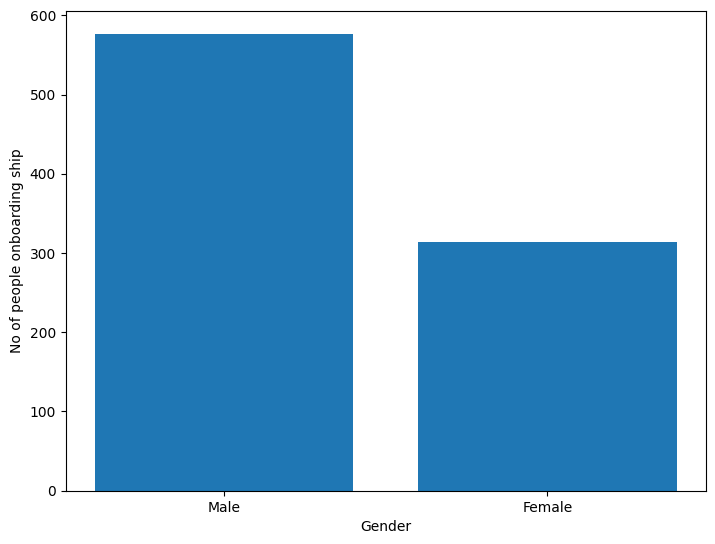

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [14]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

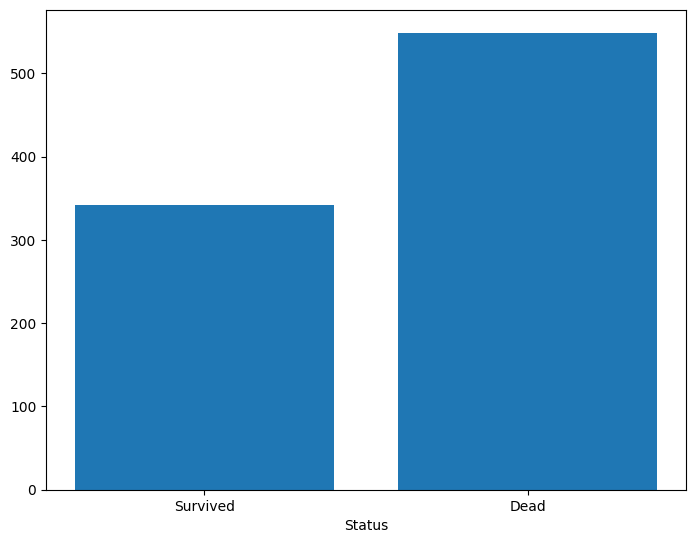

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, 'Bar graph for unsurviving people according to ticket')

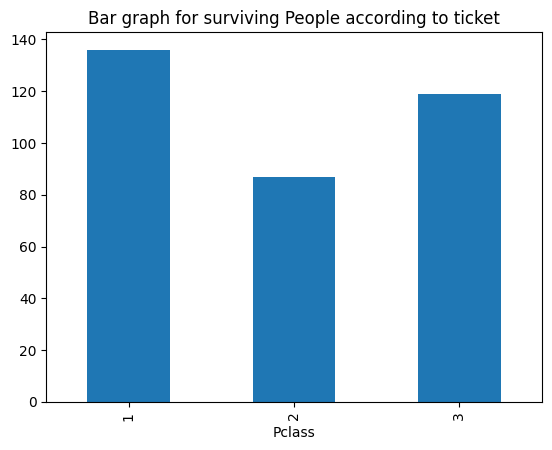

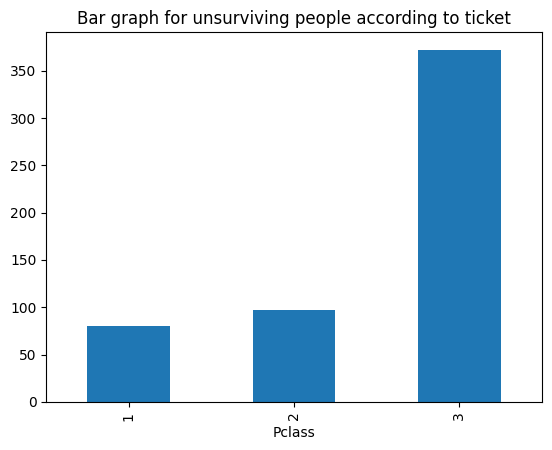

In [17]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph for surviving People according to ticket')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph for unsurviving people according to ticket')

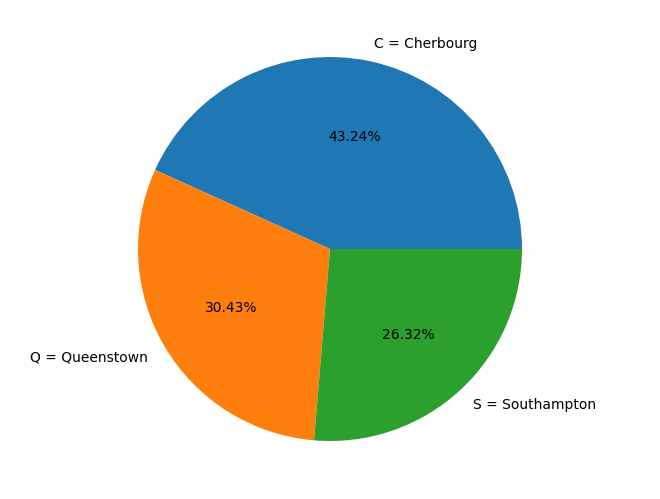

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [19]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [20]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [23]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [24]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64